In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [33]:
experiment = "01_Multiplication" # 506
# experiment = "02_Compare" # 507|508|509
# experiment = "05_Reveal" # 512
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

data=[]
framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]

base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [34]:
import pandas as pd


In [35]:
# fl_paths[-1].split("/")[-2]

In [36]:
# runtime/3600

1000
100
1000
100
[                     mean       std  bandwidths(Mbs)
bandwidths(Mbs)                                     
100              0.532000  0.028206              100
1000             0.238000  0.104009             1000
10000            0.163000  0.054985            10000
25000            0.146333  0.054170            25000,                      mean       std  bandwidths(Mbs)
bandwidths(Mbs)                                     
100              0.194000  0.006992              100
1000             0.133000  0.009487             1000
10000            0.118000  0.006325            10000
25000            0.118333  0.006989            25000,                      mean       std  bandwidths(Mbs)
bandwidths(Mbs)                                     
100              0.220000  0.004714              100
1000             0.103000  0.039172             1000
10000            0.116000  0.005164            10000
25000            0.102333  0.033185            25000,                   mean  

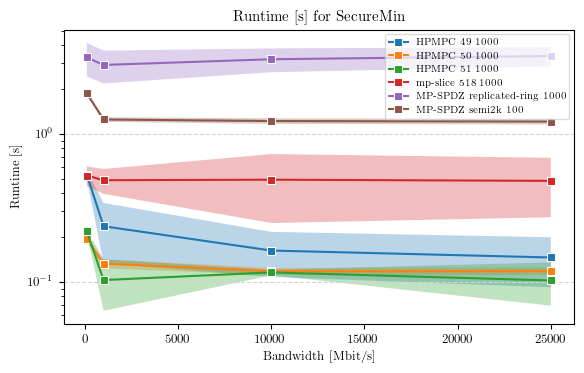

In [37]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[2]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[0] # AES
# del label[-1]
# del bandwidth[0]
# del bandwidth[-1]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

del bandwidth[-2] # secure min
del bandwidth[-2]
del label[-2]
del label[-2]

print(bandwidth)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

1000
100
1000
100


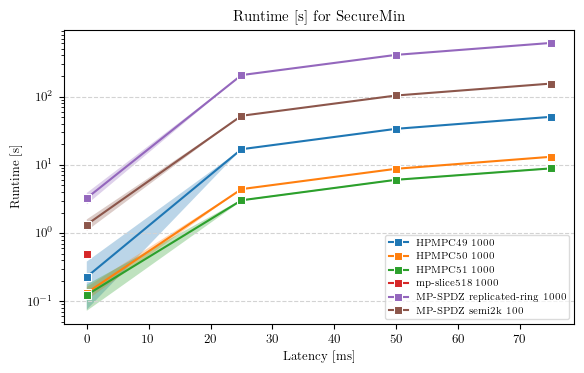

In [38]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[0] # AES
# del label[-1]
# del latency[0]
# del latency[-1]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

del latency[-2] # secure min
del latency[-2]
del label[-2]
del label[-2]

# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

[                     mean       std  packetdrops(%)
packetdrops(%)                                     
0                0.228667  0.153175               0
1                2.505000  0.287064               1
2                6.200000  1.401959               2
5               13.567000  2.021062               5,                     mean       std  packetdrops(%)
packetdrops(%)                                    
0               0.133333  0.028799               0
1               1.253000  0.658872               1
2               1.441000  0.635076               2
5               3.546000  0.459062               5,                     mean       std  packetdrops(%)
packetdrops(%)                                    
0               0.124333  0.051663               0
1               0.663000  0.640244               1
2               1.001000  0.379838               2
5               4.614000  4.455965               5,                  mean       std  packetdrops(%)
packetdrops(%)          

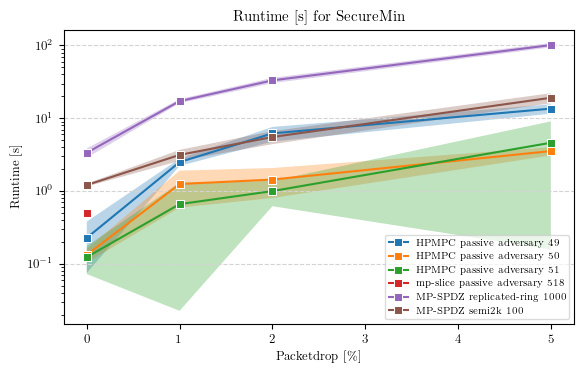

In [39]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[0] # AUCTION
# del packetdrop[1]
# del packetdrop[2]
# del packetdrop[-2]
# del packetdrop[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[0] # AES
# del label[-1]
# del packetdrop[0]
# del packetdrop[-1]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

del packetdrop[-2] # secure min
del packetdrop[-2]
del label[-2]
del label[-2]
print(packetdrop)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [\%]","Runtime [s]",True)

In [40]:
[df['mean'].iloc[0] for df in bandwidth]

[0.532, 0.194, 0.22000000000000003, 0.524, 3.289, 1.8820000000000001]

In [41]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.02820559440174156,
 0.0069920589878010204,
 0.004714045207910328,
 0.08058122196475638,
 0.8350575495803336,
 0.045655716448703705]

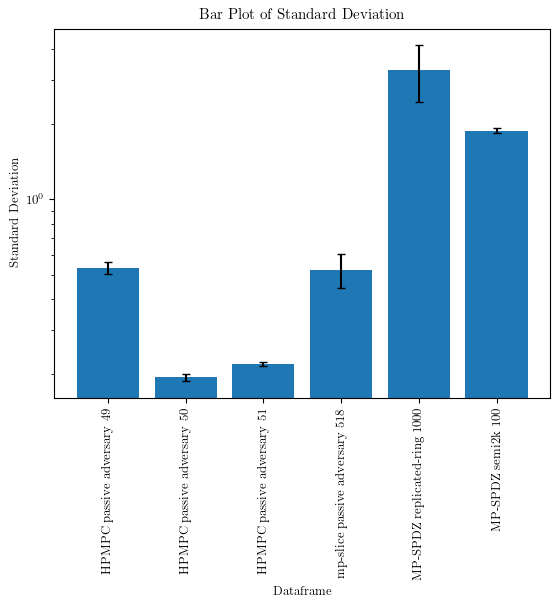

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


In [43]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Example data
# fig, ax = plt.subplots()
# deviation61 = data[0].loc[(data[0]['function'] == 507) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation62 = data[0].loc[(data[0]['function'] == 508)  & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation63 = data[0].loc[(data[0]['function'] == 509) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# 
# # Plot the first violin plot
# two_dimensional_list = [deviation61, deviation62, deviation63]
# ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# # Set the x-tick labels
# ax.set_xticks([1, 2, 3])
# ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])
# 
# 
# # Set plot title and labels
# plt.title("Devation of runtime for HP-MPC Logistic Regression")
# plt.xlabel("Comparison Type")
# plt.ylabel("Runtime [s]")
# ax.figure.set_size_inches(5.91, 2.8)
# fig.tight_layout()
# plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
# plt.show()